In [77]:
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [78]:
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2021-08-16,151.190002,146.470001,148.539993,151.119995,103296000.0,151.119995
2021-08-17,151.679993,149.089996,150.229996,150.190002,92229700.0,150.190002
2021-08-18,150.720001,146.149994,149.800003,146.360001,86326000.0,146.360001


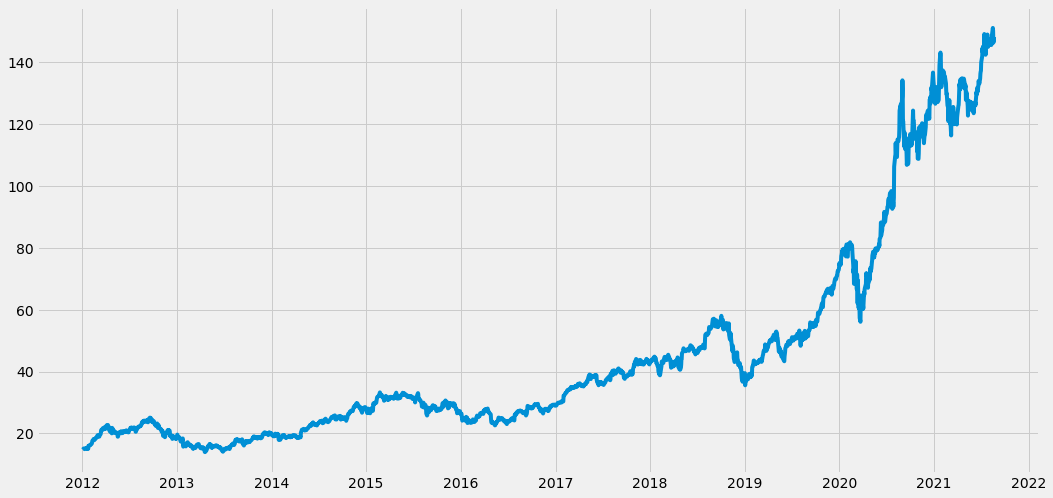

In [79]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])

In [80]:
data = df.filter(['Close'])
dataset = data.values

In [81]:
training_data_len = len(dataset) * 0.9
training_data_len

2182.5

In [82]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00538946],
       [0.00596485],
       [0.00715991],
       ...,
       [0.96529921],
       [0.96777781],
       [0.97864009]])

In [83]:
# divide data for training purpose
train_data = scaled_data[0:int(training_data_len),:]

# now split the data into X_train and y_train
x_train = []
y_train =[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i - 60 : i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)

[array([0.00538946, 0.00596485, 0.00715991, 0.00829768, 0.00812324,
       0.00851639, 0.00833674, 0.00803472, 0.00762335, 0.00889651,
       0.0100447 , 0.00969061, 0.00775092, 0.00960209, 0.00777957,
       0.01461403, 0.0140855 , 0.01477545, 0.01626731, 0.01717076,
       0.01709526, 0.01681668, 0.01800392, 0.01912086, 0.02038622,
       0.02243005, 0.02672339, 0.02678848, 0.02917859, 0.03096466,
       0.02789502, 0.02907705, 0.02905362, 0.03236801, 0.03189675,
       0.03276895, 0.03433632, 0.03520854, 0.03772102, 0.03955134,
       0.04007987, 0.04026474, 0.03713521, 0.03638015, 0.03649211,
       0.03943419, 0.04026214, 0.0420404 , 0.04623219, 0.05182474,
       0.05077809, 0.05078069, 0.05482409, 0.05608945, 0.05518859,
       0.05436586, 0.05350927, 0.056355  , 0.05830771, 0.05912524])]
[0.05710484315773823]
[array([0.00538946, 0.00596485, 0.00715991, 0.00829768, 0.00812324,
       0.00851639, 0.00833674, 0.00803472, 0.00762335, 0.00889651,
       0.0100447 , 0.00969061, 0.007

In [84]:
# conert the datasets inti numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [85]:
# Try Lin model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
#Reshape data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2122, 60, 1)

In [87]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [88]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error' )

In [89]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2122/2122 [==============================] - 59s 26ms/step - loss: 8.3279e-04


In [90]:
test_data = scaled_data[int(training_data_len) - 60:,:]

x_test = []
y_test = dataset[int(training_data_len):,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [91]:
#conert to array
x_test = np.array(x_test)

In [92]:
## Linear Model
lin_pred = lin_model.predict(x_test)
lin_pred = scaler.inverse_transform(np.array(np.reshape(np.array(lin_pred),(np.array(lin_pred).shape[0],1))))

#RMSE (Accuracy)

rmse = np.sqrt( np.mean( (( lin_pred- y_test) ** 2)))
rmse

2.667916277945792

In [93]:


#reshape for LSTM
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [94]:
#predict
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [95]:
#RMSE (Accuracy)

rmse = np.sqrt( np.mean( (( pred- y_test) ** 2)))
rmse

3.8998709182189635

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


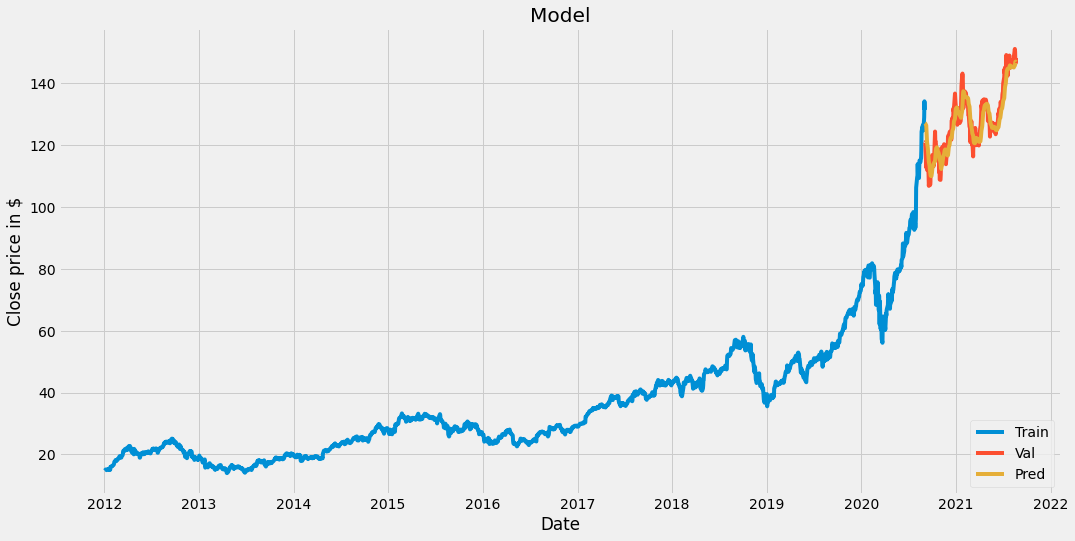

In [96]:
#plot
train = data[:int(training_data_len)]
valid = data[int(training_data_len):]
valid['pred'] = pred

# Visulize
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close price in $')
plt.plot(train['Close'])
plt.plot(valid[['Close','pred']])
plt.legend(['Train','Val','Pred'],loc = 'lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


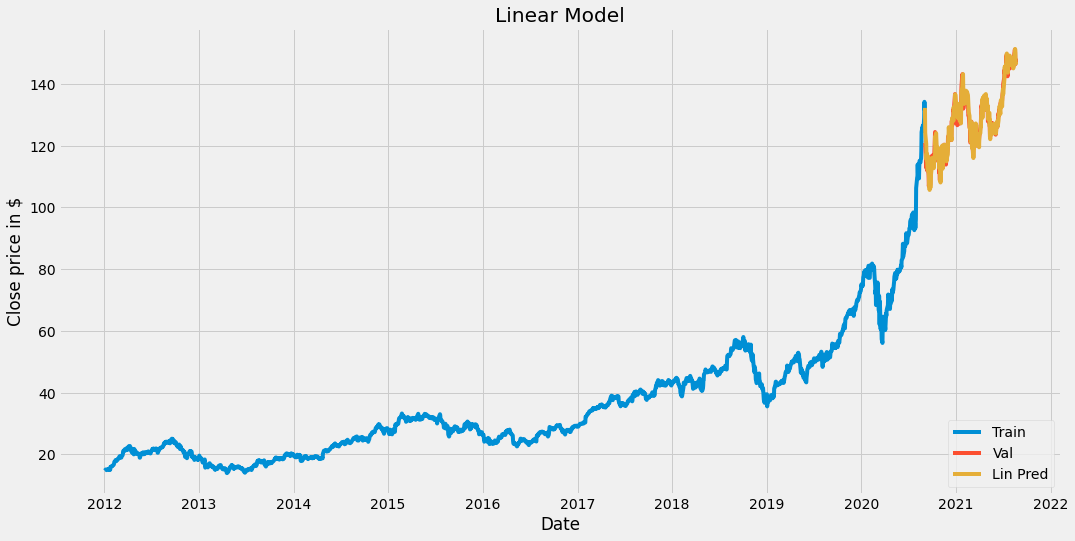

In [97]:
#plot
train = data[:int(training_data_len)]
lin_valid = data[int(training_data_len):]
lin_valid['lin_pred'] = lin_pred

# Visulize
plt.figure(figsize = (16,8))
plt.title('Linear Model')
plt.xlabel('Date')
plt.ylabel('Close price in $')
plt.plot(train['Close'])
plt.plot(lin_valid[['Close','lin_pred']])
plt.legend(['Train','Val','Lin Pred'],loc = 'lower right')
plt.show()

In [98]:
lin_valid

,Close,lin_pred
Date,,
2020-09-03,120.879997,132.199710
2020-09-04,120.959999,124.075639
2020-09-08,112.820000,120.482631
2020-09-09,117.320000,115.449480
2020-09-10,113.489998,117.417330
...,...,...
2021-08-16,151.119995,150.047493
2021-08-17,150.190002,151.299748
2021-08-18,146.360001,150.753054
